# 1. Fashion MNIST 실습

In [1]:
from tensorflow import keras

(train_data, train_target), (test_data, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
train_data.shape, train_target.shape

((60000, 28, 28), (60000,))

In [3]:
test_data.shape, test_target.shape

((10000, 28, 28), (10000,))

In [4]:
train_scaled = train_data / 255.0
test_scaled = test_data / 255.0

In [5]:
# 검증 데이터 만들기
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=0)

In [6]:
train_scaled.shape, val_scaled.shape

((48000, 28, 28), (12000, 28, 28))

In [7]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 13s 6ms/step - loss: 0.4976 - accuracy: 0.8237 - val_loss: 0.4251 - val_accuracy: 0.8447
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3745 - accuracy: 0.8649 - val_loss: 0.3517 - val_accuracy: 0.8701
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3356 - accuracy: 0.8763 - val_loss: 0.3518 - val_accuracy: 0.8727
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3121 - accuracy: 0.8863 - val_loss: 0.3379 - val_accuracy: 0.8785
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2909 - accuracy: 0.8919 - val_loss: 0.3272 - val_accuracy: 0.8788
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2761 - accuracy: 0.8974 - val_loss: 0.3067 - val_accuracy: 0.8891
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2605 - accuracy: 0.9016 - val_loss: 0.3293 - val_accuracy

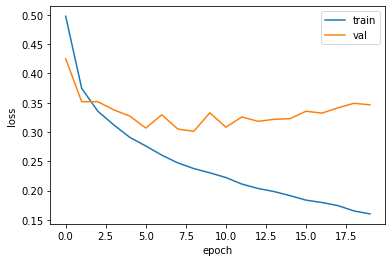

In [11]:
# 훈련세트는 꾸준히 감소하지만 검증세트는 10번째 에포크 이후로 점점 상승함
# 과대적합 모델이 만들어짐
import matplotlib.pyplot as plt

def make_plot():
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'])
  plt.show()

make_plot()

In [12]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3774 - accuracy: 0.8895


[0.3773873746395111, 0.8895000219345093]

In [13]:
# 과대적합을 막기 위해 드롭아웃 적용
def make_model():
  model = models.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(300, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(10, activation='softmax'))

  # 드롭아웃 적용한 모델 컴파일하기
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [14]:
model = make_model()

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 드롭아웃 적용한 모델 컴파일하기
#model.compile(loss='sparse_categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

In [17]:
# 드롭아웃 적용한 모델 학습하기
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5403 - accuracy: 0.8081 - val_loss: 0.4081 - val_accuracy: 0.8534
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4150 - accuracy: 0.8481 - val_loss: 0.3622 - val_accuracy: 0.8704
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3770 - accuracy: 0.8613 - val_loss: 0.3625 - val_accuracy: 0.8659
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3564 - accuracy: 0.8700 - val_loss: 0.3420 - val_accuracy: 0.8758
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3395 - accuracy: 0.8749 - val_loss: 0.3447 - val_accuracy: 0.8707
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3273 - accuracy: 0.8791 - val_loss: 0.3391 - val_accuracy: 0.8765
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3140 - accuracy: 0.8832 - val_loss: 0.3238 - val_accuracy:

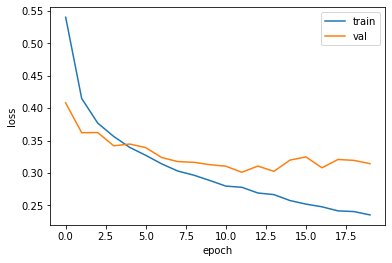

In [18]:
# 드롭아웃 후 loss값 시각화 해보기
make_plot()

In [19]:
# 에포크 12까지 검증 세트의 loss가 줄어들다가 12부터 다시 증가하고 있음
# 에포트 횟수를 12으로 다시 훈련하기
history = model.fit(train_scaled, train_target, epochs=12, validation_data=(val_scaled, val_target))

Epoch 1/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2312 - accuracy: 0.9120 - val_loss: 0.3063 - val_accuracy: 0.8926
Epoch 2/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2288 - accuracy: 0.9133 - val_loss: 0.3163 - val_accuracy: 0.8908
Epoch 3/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2257 - accuracy: 0.9152 - val_loss: 0.3163 - val_accuracy: 0.8981
Epoch 4/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2223 - accuracy: 0.9151 - val_loss: 0.3302 - val_accuracy: 0.8892
Epoch 5/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2199 - accuracy: 0.9155 - val_loss: 0.3035 - val_accuracy: 0.8957
Epoch 6/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2191 - accuracy: 0.9170 - val_loss: 0.3198 - val_accuracy: 0.8958
Epoch 7/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2135 - accuracy: 0.9186 - val_loss: 0.3168 - val_accuracy:

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8891


[0.36277350783348083, 0.8891000151634216]

In [21]:
# 모델 저장하기 (모델 구조 + 모델 파라미터 모두 저장)
model.save('fashion_mnist.h5')

In [22]:
# 모델 불러오기
model2 = models.load_model('fashion_mnist.h5')
model2

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 불러온 모델로 평가하기
model2.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8891


[0.36277350783348083, 0.8891000151634216]

In [25]:
# 콜백 사용하기 : 훈련 과정 중간에 어떤 작업을 수행할 수 있도록 하는 기능
model = make_model()

#model.compile(loss='sparse_categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

In [26]:
# ModelCheckpoint 콜백 : 훈련하는 동안에 모델의 체크포인트를 저장
# save_best_only=True를 지정하면 최상의 검증 점수를 만드는 모델을 'best-model.h5'에 저장함
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

In [27]:
# 콜백 설정하기
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5433 - accuracy: 0.8067 - val_loss: 0.4339 - val_accuracy: 0.8369
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4135 - accuracy: 0.8486 - val_loss: 0.3641 - val_accuracy: 0.8660
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8624 - val_loss: 0.3594 - val_accuracy: 0.8670
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3572 - accuracy: 0.8689 - val_loss: 0.3395 - val_accuracy: 0.8766
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3405 - accuracy: 0.8741 - val_loss: 0.3306 - val_accuracy: 0.8791
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3262 - accuracy: 0.8782 - val_loss: 0.3276 - val_accuracy: 0.8817
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3185 - accuracy: 0.8825 - val_loss: 0.3393 - val_accuracy:

In [28]:
model3 = keras.models.load_model('best-model.h5')
model3.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8847


[0.3296525478363037, 0.8847000002861023]

In [29]:
# 조기종료(Early Stopping) : 일정 에포크동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤
model = make_model()

#model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [30]:
# 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지함
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [31]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5430 - accuracy: 0.8059 - val_loss: 0.4118 - val_accuracy: 0.8512
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4148 - accuracy: 0.8490 - val_loss: 0.3688 - val_accuracy: 0.8659
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3760 - accuracy: 0.8614 - val_loss: 0.3589 - val_accuracy: 0.8690
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3561 - accuracy: 0.8680 - val_loss: 0.3486 - val_accuracy: 0.8727
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3398 - accuracy: 0.8746 - val_loss: 0.3367 - val_accuracy: 0.8775
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3279 - accuracy: 0.8785 - val_loss: 0.3156 - val_accuracy: 0.8852
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3149 - accuracy: 0.8822 - val_loss: 0.3226 - val_accuracy:

In [32]:
# 몇 번째 에포크에서 훈련이 중지되었는지 확인하기
early_stopping_cb.stopped_epoch

7

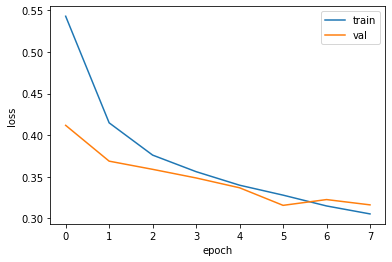

In [33]:
# 실행 시마다 결과는 달라짐
# 그래프에서는 N번째 에포크라면 0부터 시작하므로 실제는 N+1번째 에포크가 제일 낮은 손실점수를 냄
make_plot()

In [34]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3500 - accuracy: 0.8736


[0.3499702513217926, 0.8736000061035156]